In [1]:
import tensorflow.keras as K
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics 

2025-01-07 07:21:41.805098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# : Load the CIFAR 10 dataset and split it into training and testing sets. 
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [3]:
y_train_cat = K.utils.to_categorical(y_train)
y_test_cat = K.utils.to_categorical(y_test)
# : Converts the existing categorical array with integers to a binary matrix or array.
print((y_test_cat.shape))

(10000, 10)


In [4]:
base_model = K.applications.VGG19(include_top=False, weights='imagenet', input_shape=(128,128,3), classes=y_train_cat.shape[1])
# : Widely used for image classification, VGG19 is a image classification Neural network which we are using as probably transfer learning method here.
base_model.trainable = False
# : It freezes the learnt weights of the models to preserve the accuracy of the model like VGG19
print(base_model.summary())

2025-01-07 07:26:12.999199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-07 07:26:13.010380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-07 07:26:13.012305: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [5]:

model= K.Sequential()
# : Instantiate a sequential Keras model for building a sequential neural network.  
model.add(tf.keras.Input(shape=(32, 32, 3)))
# : The input shape (32, 32, 3) specifies images of size 32x32 pixels with 3 channels (likely RGB).
model.add(tf.keras.layers.Resizing(128,128))
# : This layer resizes the input images from their original dimensions (32x32) to 128x128.
model.add(base_model)
# : Adds base model here VGG19 to our neural network.
model.add(Flatten()) 
# : Converts the output of the previous layer into a one dimensional vector.
model.add(K.layers.Dropout(0.25))
# : Add a dropout layer with probability of 0.25
model.add(Dense(10,activation=('softmax')))
# : Add a desnse layer which gives us final output and has the function softmax.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 20106314 (76.70 MB)
Trainable params: 81930 (320.04 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [6]:
batch_size= 128
epochs=5

# learn_rate=.001

sgd=K.optimizers.Adam(learning_rate=0.001) # learning_rate=learn_rate

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
history = model.fit(x_train, y_train_cat,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.15,
              shuffle=True)

Epoch 1/5


2025-01-07 07:27:52.941380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2025-01-07 07:27:53.088521: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-07 07:27:58.534328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-01-07 07:27:58.634701: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f317701f140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-07 07:27:58.634838: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB MIG 1g.10gb, Compute Capability 8.0
2025-01-07 07:27:58.653194: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-07 07:2

  1/333 [..............................] - ETA: 37:56 - loss: 19.0264 - accuracy: 0.1250

2025-01-07 07:27:58.806500: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


333/333 [==============================] - 78s 213ms/step - loss: 4.1750 - accuracy: 0.7027 - val_loss: 2.9669 - val_accuracy: 0.7704
Epoch 2/5
333/333 [==============================] - 66s 198ms/step - loss: 2.6896 - accuracy: 0.7929 - val_loss: 3.2626 - val_accuracy: 0.7789
Epoch 3/5
333/333 [==============================] - 66s 199ms/step - loss: 2.2922 - accuracy: 0.8193 - val_loss: 3.4238 - val_accuracy: 0.7867
Epoch 4/5
333/333 [==============================] - 66s 199ms/step - loss: 2.0916 - accuracy: 0.8351 - val_loss: 3.7909 - val_accuracy: 0.7832
Epoch 5/5
333/333 [==============================] - 66s 199ms/step - loss: 2.0803 - accuracy: 0.8444 - val_loss: 4.0019 - val_accuracy: 0.7869


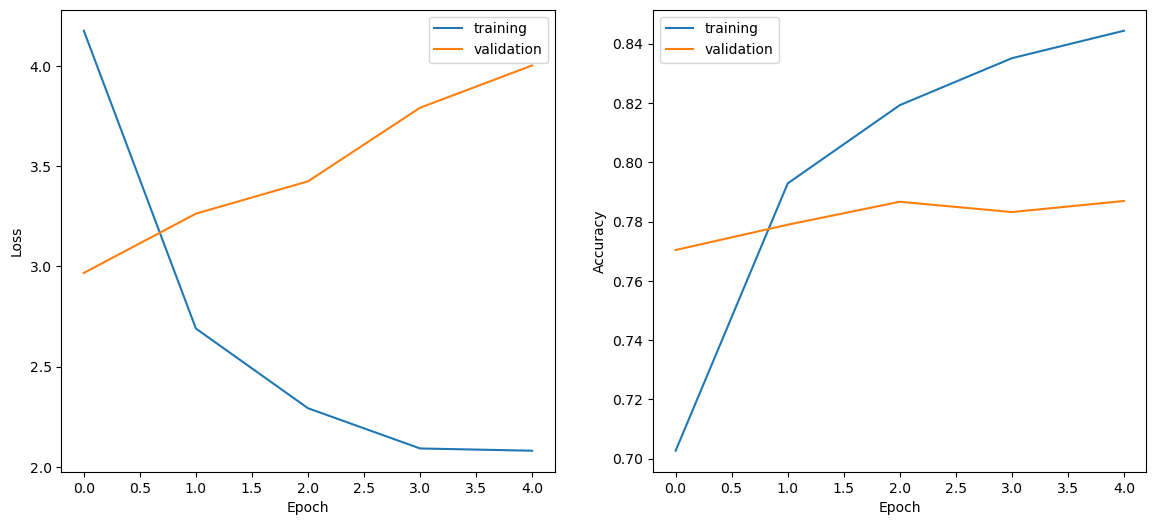

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
# : Command to create two subplots in a plot.
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
# : Print the sub-plot for loss with line graph for validation and training.
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="training")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend();
# : Print the sub-plot for accuracy with line graph for validation and training.

In [10]:
y_pred = model.predict(x_test)
# : Predict the labels for the test set.
y_pred_classNb = np.argmax(y_pred,axis=1)
# : A 2D array of shape (n_samples, n_classes) containing the predicted probabilities or logits for each class.

313/313 [==============================] - 18s 51ms/step


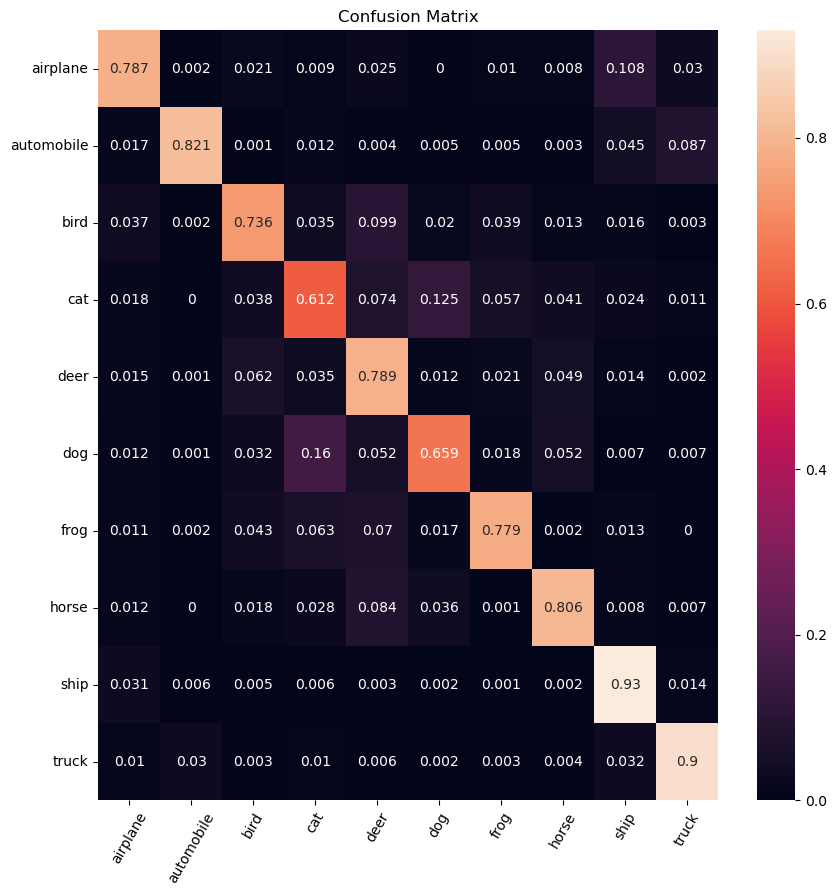

In [12]:
class_names=np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_classNb, normalize='true')
# : Create a confusion matrix.
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g');
# : Create a heat map which allows us to map the accuracy of prediction.
ax = plt.gca()
ax.set_title("Confusion Matrix")
ax.set_xticklabels(class_names, rotation=60)
ax.set_yticklabels(class_names, rotation=0);
# : It is used to set and customize the tick labels for the x-axis and y-axis in a Matplotlib plot. Here’s a breakdown of what it does.

In [13]:
# After adding the new last classification layers one can also run a fine tuning on the whole network (or only a part of it)
base_model.trainable=True
# : Now the parameters or weights for the VGG19 model will also be trained
model.summary()
# : Get the summary of the model, how many params would we need

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 20106314 (76.70 MB)
Trainable params: 20106314 (76.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
learning_rate = 0.00001
# : Set learning rate as 0.00001
adam=K.optimizers.Adam(learning_rate=learning_rate)
# : Use the adam optimizer with our learning rate.
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# : Compile the model.
# This step takes a lot of time...
epochs = 3
history = model.fit(x_train, y_train_cat,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.15,
              shuffle=True)
# : Get the details of training

Epoch 1/3
333/333 [==============================] - 199s 535ms/step - loss: 0.7392 - accuracy: 0.8460 - val_loss: 0.7102 - val_accuracy: 0.8247
Epoch 2/3
333/333 [==============================] - 176s 530ms/step - loss: 0.3134 - accuracy: 0.9000 - val_loss: 0.6215 - val_accuracy: 0.8465
Epoch 3/3
333/333 [==============================] - 176s 530ms/step - loss: 0.1964 - accuracy: 0.9325 - val_loss: 0.5864 - val_accuracy: 0.8541


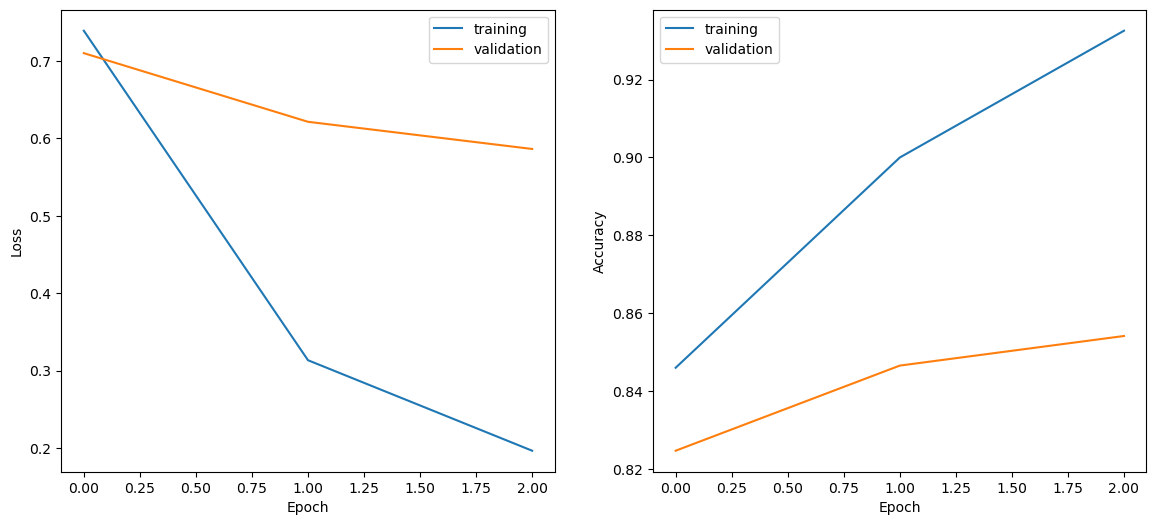

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="training")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend();
# : 

313/313 [==============================] - 15s 48ms/step


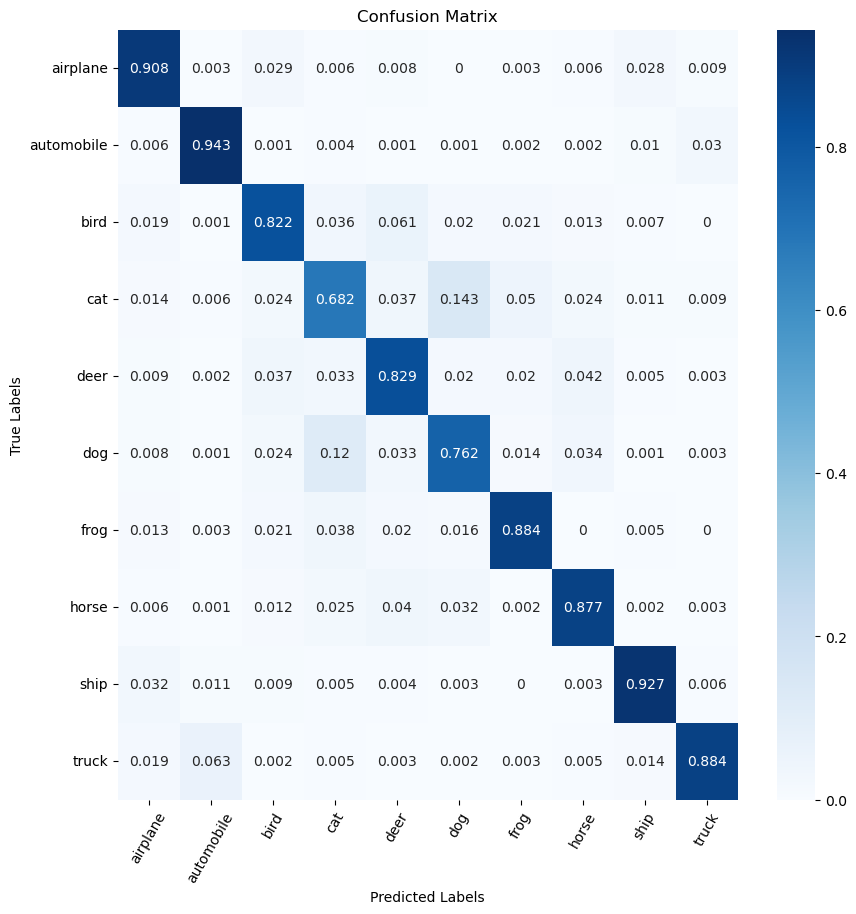

In [17]:
y_pred = model.predict(x_test)
y_pred_classNb = np.argmax(y_pred,axis=1)
# : Workflow in machine learning for generating predictions from a trained model and determining the predicted class for each input. 
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_classNb, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

ax = plt.gca()
ax.set_title("Confusion Matrix")
ax.set_xticklabels(class_names, rotation=60)  # Use class names for ticks
ax.set_yticklabels(class_names, rotation=0)   # Use class names for ticks

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
